# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [382]:
import pandas as pd
import matplotlib.pyplot as plt

% %matplotlib inline

In [383]:
# load datasets

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [642]:
# get tyoes of fuels in both years

In [656]:
df_08.fuel.value_counts().keys()

Index(['Gasoline', 'ethanol', 'gas', 'CNG'], dtype='object')

In [653]:
df_18.fuel.value_counts().keys()

Index(['Gasoline', 'Gas', 'Ethanol', 'Diesel', 'Electricity'], dtype='object')

In [589]:
# query both years, where fuel does not use gasoline
alt_fuel_08 = df_08.query("fuel in ['ethanol','CNG']")['model'].nunique()
alt_fuel_18 = df_18.query("fuel in ['Ethanol','Electricity']")['model'].nunique()

In [659]:
alt_fuel_08

2

In [389]:
# df_18.query("fuel in ['Ethanol','Electricity']")

In [658]:
change= (alt_fuel_18-alt_fuel_08)
change = change/alt_fuel_08   
change= change*100
print(f'percentage growth of unique modesl using alternative fuel from 2008-2018 is {round(change,2)}%')

percentage growth of unique modesl using alternative fuel from 2008-2018 is 1200.0%


#### visualize

In [529]:
x=['2008','2018']
height = [alt_fuel_08, alt_fuel_18]
height

[2, 26]

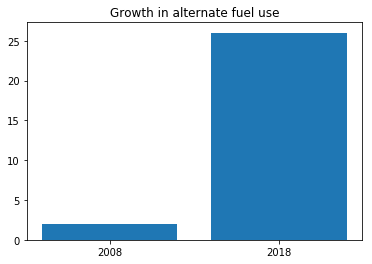

In [530]:
plt.bar(x, height)
plt.title('Growth in alternate fuel use');

###### find the proprtion

In [617]:
# get the unique count of all fuels
total_fuel_08 = df_08['model'].nunique()
total_fuel_18 = df_18['model'].nunique()
print(total_fuel_08)
print(total_fuel_18)

377
357


In [618]:
# calculate proprtion
fuel_prop08 = alt_fuel_08/ total_fuel_08
fuel_prop18 = alt_fuel_18/total_fuel_18

In [619]:
fuel_prop18

0.07282913165266107

#### visualize

In [620]:
height = [fuel_prop08, fuel_prop18]
x=['2008', '2018']

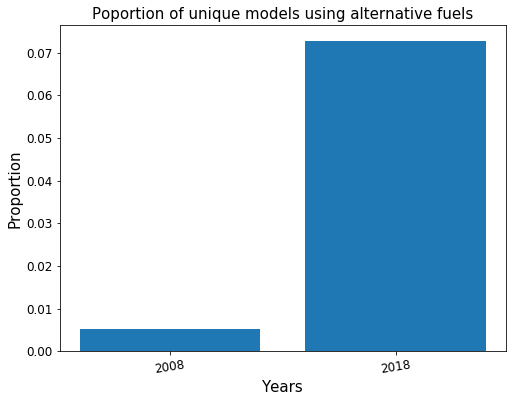

In [660]:
plt.subplots(figsize=(8,6))
plt.xlabel('Years', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.xticks(fontsize=12, rotation=9)
plt.yticks(fontsize=12, rotation=0)
plt.title('Poportion of unique models using alternative fuels', fontsize=15)
plt.bar(x, height);

### Q2: How much have vehicle classes improved in fuel economy?  

In [563]:
vh_08 = df_08['veh_class'].unique() 
vh_18 = df_18['veh_class'].unique()
print(vh_08)
print(vh_18)

['SUV' 'midsize car' 'small car' 'station wagon' 'large car' 'minivan'
 'van' 'pickup']
['small SUV' 'small car' 'midsize car' 'large car' 'standard SUV'
 'station wagon' 'pickup' 'special purpose' 'minivan']


In [565]:
# get common vehicle makes from both set
vh_08_set=set(vh_08)
vh_18_set = set(vh_18)
common_vh=vh_08_set.intersection(vh_18_set)
common_vh=list(common_vh)

In [568]:
# confirm common vehicles
lent = len(common_vh)
count = 0
for i in common_vh:
    if i in vh_08 and i in vh_18:
        count+=1
if count == len(common_vh):
    print(True)
else:
    print(False)

True


In [569]:
# (common_vh in vh_08)

In [570]:
# query commn vehicles in 2008
veh_08 = df_08[df_08['veh_class'].apply(lambda x : x in common_vh)]
veh_18 = df_18[df_18['veh_class'].apply(lambda x : x in common_vh)]

In [571]:
# confrim query 
print(list(set(veh_08.veh_class.unique())) == common_vh)
print(list(set(veh_18.veh_class.unique())) == common_vh)

True
True


In [537]:
# groupby commont vehicles
veh_fuelecon_08 = veh_08.groupby('veh_class').mean().cmb_mpg
veh_fuelecon_18 = veh_18.groupby('veh_class').mean().cmb_mpg

In [572]:
print(veh_fuelecon_08)
print(veh_fuelecon_18)

veh_class
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
Name: cmb_mpg, dtype: float64
veh_class
large car        23.409091
midsize car      27.884058
minivan          20.800000
pickup           18.589744
small car        25.421053
station wagon    27.529412
Name: cmb_mpg, dtype: float64


In [573]:
# measure % growth in fuel economy of vehicle class
growth_fuelecon = round(((veh_fuelecon_18-veh_fuelecon_08)/veh_fuelecon_08)*100,2).to_dict()

In [540]:
growth_fuelecon

{'large car': 26.47,
 'midsize car': 29.08,
 'minivan': 8.8,
 'pickup': 14.21,
 'small car': 20.45,
 'station wagon': 23.08}

In [574]:
veh_list= list(growth_fuelecon.keys())
count = 0
print('Vehicle Class','\t','% Growth')
while count < len(veh_list):
    
    print(f'{veh_list[count]}\t\t{growth_fuelecon[veh_list[count]]}')
    count+=1

Vehicle Class 	 % Growth
large car		26.47
midsize car		29.08
minivan		8.8
pickup		14.21
small car		20.45
station wagon		23.08


#### visualize

In [575]:
height = growth_fuelecon.values()
x=veh_list

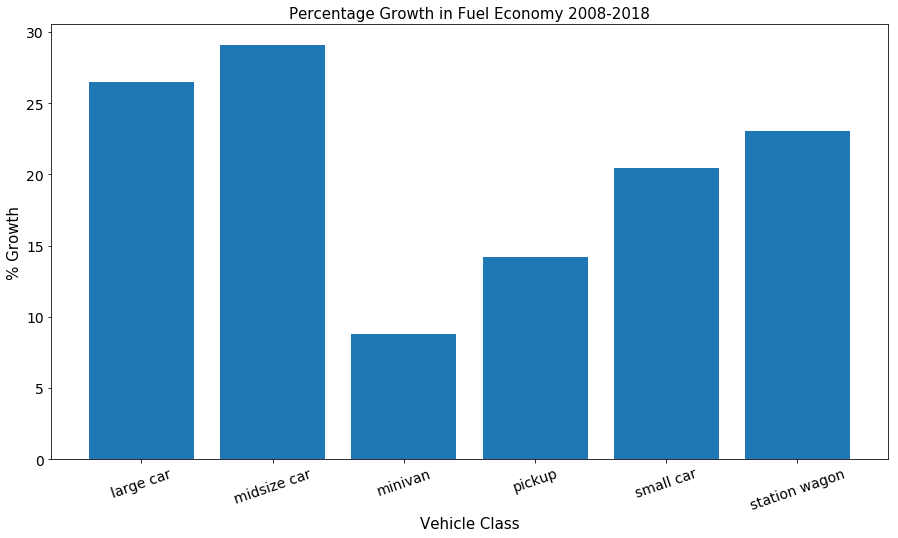

In [576]:
plt.subplots(figsize=(15, 8));
plt.bar(x, height)
plt.title('Percentage Growth in Fuel Economy 2008-2018', fontsize=15)
plt.xlabel('Vehicle Class', fontsize=15)
plt.xticks(fontsize=14, rotation=19)
plt.yticks(fontsize=14)
plt.ylabel('% Growth', fontsize=15);

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [543]:
# smart way types for years
print(set(df_08.smartway.values))
print(set(df_18.smartway.values))

{'yes', 'no'}
{'Yes', 'No', 'Elite'}


In [544]:
# smatway 
sw_08 = df_08.query('smartway == "yes"')
sw_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [545]:
sw_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,air_pollution
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes,7.0


In [546]:
sw_18.tail(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,air_pollution
830,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7,60.0,58.0,59.0,10,Elite,7.0
831,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Electricity,standard SUV,7,63.0,61.0,62.0,10,Elite,7.0


In [547]:
# describe smart way vehicles 
sw08_qualities = sw_08.describe()
sw08_qualities.head(1)

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,air_pollution
count,380.0,380.0,380.0,380.0,380.0,380.0,380.0,380.0


In [548]:
sw18_qualities=sw_18.describe()
sw18_qualities.head(1)

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,air_pollution
count,108.0,108.0,108.0,108.0,108.0,108.0,108.0,108.0


In [577]:
sw_qualities_change = ((sw18_qualities - sw08_qualities)/sw08_qualities)*100

In [578]:
sw_qualities_change

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,air_pollution
count,-71.578947,-71.578947,-71.578947,-71.578947,-71.578947,-71.578947,-71.578947,-71.578947
mean,-31.308672,-18.463993,-29.227370,66.350825,45.961327,57.397142,15.396623,-29.227370
std,-34.551257,-58.451250,56.637032,377.303112,325.834455,385.182653,44.726571,56.637032
min,-7.692308,-25.000000,-50.000000,47.058824,22.727273,30.000000,16.666667,-50.000000
25%,-34.065934,0.000000,-57.142857,47.368421,38.461538,40.909091,16.666667,-57.142857
50%,-29.166667,0.000000,-21.428571,42.500000,32.142857,39.130435,0.000000,-21.428571
75%,-33.333333,-33.333333,0.000000,42.045455,34.166667,40.000000,28.571429,0.000000
max,-30.000000,-25.000000,-26.315789,135.416667,120.000000,130.434783,0.000000,-26.315789


#### visualize

In [579]:
x= sw_qualities_change.columns.tolist()
height=sw_qualities_change.loc['mean'].values.tolist()

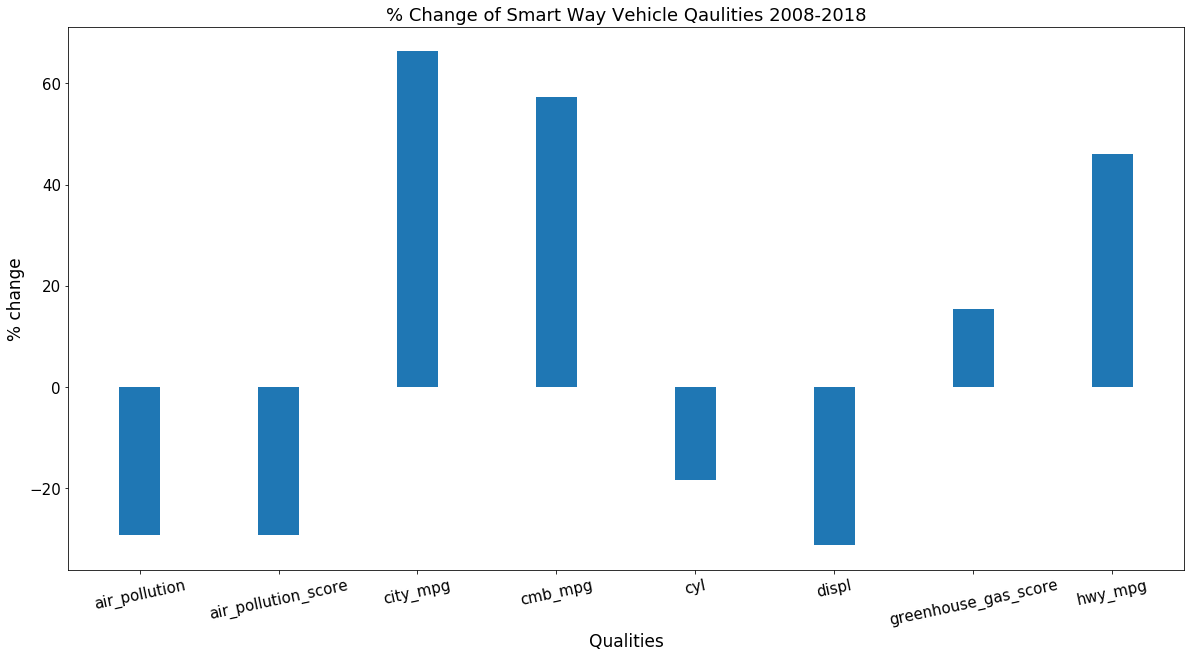

In [585]:
plt.subplots(figsize=(20, 10))
plt.bar(x, height, align='center', width=0.3)
plt.xlabel('Qualities', fontsize=17)
plt.xticks(fontsize=15,rotation=12)
plt.title("% Change of Smart Way Vehicle Qaulities 2008-2018", fontsize=18);
plt.ylabel('% change', fontsize=17)
plt.yticks(fontsize=15);

### Q4: What features are associated with better fuel economy?

In [553]:
df_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,air_pollution
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no,7.0
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no,7.0


In [554]:
df_18.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,air_pollution
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3,20.0,28.0,23.0,5,No,3.0
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3,19.0,27.0,22.0,4,No,3.0


In [555]:
# find the average fuel use - avg(cmb_mpg) in both years
cmb08_mean = round(df_08.cmb_mpg.mean(),2)
cmb18_mean = round(df_18.cmb_mpg.mean(),2)
print('cmb08_mean:',cmb08_mean)
print('cmb18_mean:',cmb18_mean)

cmb08_mean: 19.79
cmb18_mean: 24.03


In [556]:
# filter both years by avg cmb_mpg

better_fueluse_08 = df_08.query('cmb_mpg > 19.79')
better_fueluse_18 = df_18.query('cmb_mpg > 24.03')

In [557]:
# describe better_fueluse
betterfuel_dscp08=better_fueluse_08.describe()
betterfuel_dscp08

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,air_pollution
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692,6.998073
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935,1.159565
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000,4.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000,7.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000,9.500000


In [558]:
# describe better_fueluse
betterfuel_dscp18=better_fueluse_18.describe()
betterfuel_dscp18

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,air_pollution
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268,4.856707
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358,1.860802
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000,1.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000,3.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000,5.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000,7.000000


#### visualize

In [559]:
better_fueluse_change = ((betterfuel_dscp18 - betterfuel_dscp08)/betterfuel_dscp08)*100
better_fueluse_change

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,air_pollution
count,-36.801541,-36.801541,-36.801541,-36.801541,-36.801541,-36.801541,-36.801541,-36.801541
mean,-26.369573,-17.766894,-30.599364,35.213458,27.901938,32.268606,-4.675269,-30.599364
std,-40.110824,-55.020140,60.474168,244.990789,195.788330,244.506511,75.214023,60.474168
min,-7.692308,-25.000000,-75.000000,23.529412,35.000000,25.000000,-33.333333,-75.000000
25%,-30.434783,0.000000,-50.000000,27.777778,24.000000,23.809524,-16.666667,-50.000000
50%,-20.000000,0.000000,-28.571429,25.000000,22.222222,27.272727,0.000000,-28.571429
75%,-33.333333,-33.333333,0.000000,33.333333,24.137931,29.166667,0.000000,0.000000
max,-41.666667,-25.000000,-26.315789,135.416667,120.000000,130.434783,0.000000,-26.315789


In [560]:
height=better_fueluse_change.loc['mean'].values.tolist()
x = better_fueluse_change.columns.tolist()

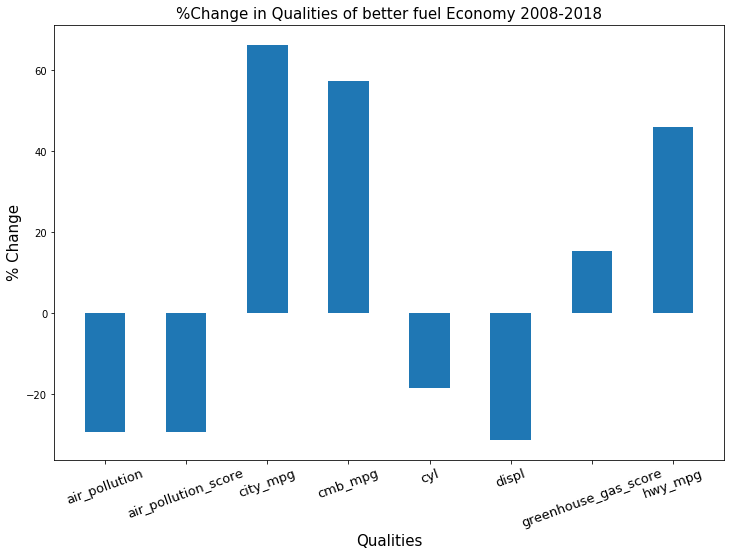

In [587]:
plt.subplots(figsize=(12,8));
plt.xlabel('Qualities', fontsize=15)
plt.ylabel('% Change', fontsize=15)
plt.xticks(fontsize=13, rotation=20)
plt.title('%Change in Qualities of better fuel Economy 2008-2018', fontsize=15)
plt.bar(x, height, width=0.5, align='center');